In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [4]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
X= df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [12]:
import matplotlib.pyplot as  plt
% matplotlib inline

In [26]:
label_dict = {1:"Iris-Setosa",
              2:"Iris-Versicolor",
              3:"Iris-Virgnica"}
feature_dict = {0:"sepal length [cm]",
                1: "sepal width [cm]",
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

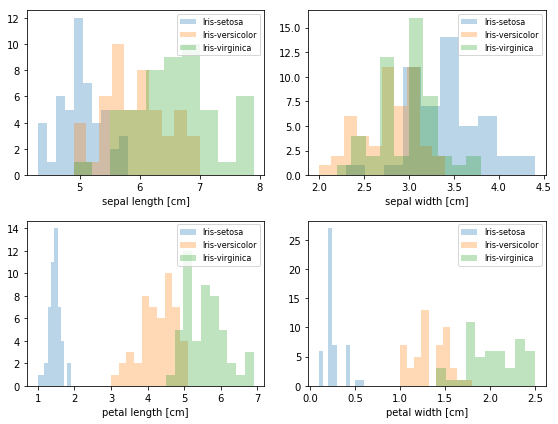

In [27]:
plt.figure(figsize= (8,6))

for cnt in range(4):
    plt.subplot(2,2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y == lab,cnt],label = lab,bins = 10,alpha = 0.3, )
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [31]:
mean_vec = np.mean(X_std, axis = 0)
mean_vec

array([ 2.38437160e-16,  2.38437160e-17, -9.53748639e-17, -1.43062296e-16])

In [32]:
cov_mat=((X_std - mean_vec)).T.dot((X_std - mean_vec)) /(X_std.shape[0] - 1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [34]:
print('Nmupy covariance matrix \n%s' %np.cov(X_std.T))

Nmupy covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [39]:
cov_mat =np.cov(X_std.T)

In [40]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [48]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
print('------')

eig_pairs.sort(key=lambda x:x[0], reverse=True)

print('Eigenvalues in descending order:')

for i in eig_pairs:
    print(i[0])

[(2.9244283691111126, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535072, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813383, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270565, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
------
Eigenvalues in descending order:
2.9244283691111126
0.9321523302535072
0.14946373489813383
0.020982592764270565


In [50]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

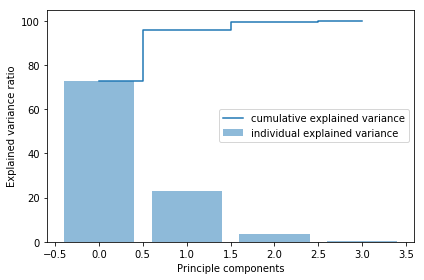

In [53]:
plt.figure(figsize =(6,4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(4),cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [60]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

In [62]:
matrix_w

array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

In [63]:
Y= X_std.dot(matrix_w)
Y

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

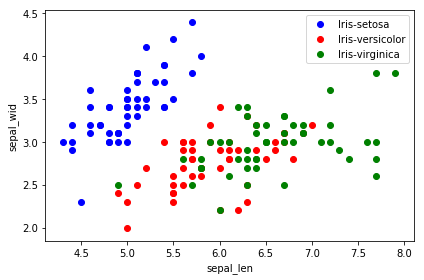

In [65]:
plt.figure(figsize=(6,4))
for lab,col in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),('blue','red','green')):
    plt.scatter(X[y==lab,0],
                X[y==lab,1],
                label = lab,
                c= col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

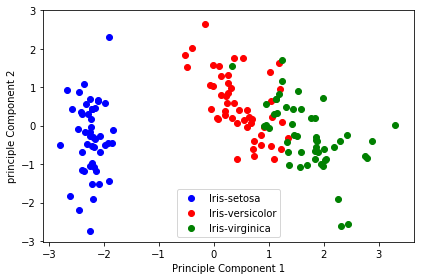

In [67]:
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),('blue','red','green')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label =lab,
                c = col)
plt.xlabel('Principle Component 1')
plt.ylabel('principle Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()